In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
picher_df = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data/%ED%88%AC%EC%88%98_2017.csv")
batter_df = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data/%ED%83%80%EC%9E%90_2017.csv")

In [7]:
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [8]:
batter_df.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [9]:
picher_df.shape, batter_df.shape

((152, 22), (191, 21))

In [17]:
#현재 OS에 설치되어 있는 폰트
import matplotlib as mpl
sorted(set([i.name for i in mpl.font_manager.fontManager.ttflist]))
mpl.rc('font',family='HYGothic-Extra')

In [19]:
picher_df['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

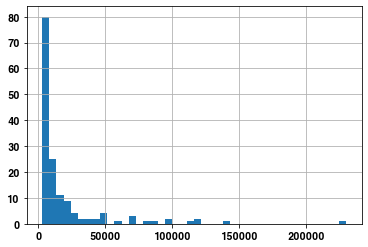

In [22]:
picher_df['연봉(2018)'].hist(bins='auto')
plt.show()

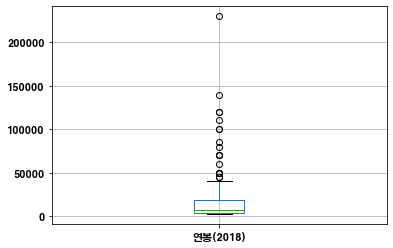

In [24]:
picher_df.boxplot(column=['연봉(2018)'])
plt.show()

In [25]:
picher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [30]:
picher_df2 =  picher_df.iloc[:,2:-2]
picher_df2.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38


In [31]:
picher_df2.corr()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
승,1.000000,0.710749,0.053747,0.092872,0.105281,0.397074,0.773560,0.906093,0.078377,-0.404710,-0.116147,-0.171111,0.131178,-0.271086,0.851350,-0.303133,-0.314159,0.821420
패,0.710749,1.000000,0.066256,0.098617,0.121283,0.343147,0.771395,0.829018,0.031755,-0.386313,-0.064467,-0.133354,-0.020994,-0.188036,0.595989,-0.233416,-0.238688,0.625641
세,0.053747,0.066256,1.000000,0.112716,0.605229,0.434290,-0.177069,0.020278,0.170436,-0.131394,-0.073111,-0.089212,0.167557,-0.150348,0.167669,-0.199746,-0.225259,0.084151
홀드,0.092872,0.098617,0.112716,1.000000,0.490076,0.715527,-0.285204,0.024631,0.186790,-0.146806,-0.076475,-0.104307,0.048123,-0.155712,0.003526,-0.211515,-0.237353,-0.038613
블론,0.105281,0.121283,0.605229,0.490076,1.000000,0.630526,-0.264160,0.014176,0.188423,-0.137019,-0.064804,-0.112480,0.100633,-0.160761,0.008766,-0.209014,-0.237815,-0.058213
경기,0.397074,0.343147,0.434290,0.715527,0.630526,1.000000,-0.037443,0.376378,0.192487,-0.364293,-0.113545,-0.241608,0.105762,-0.320177,0.281595,-0.345351,-0.373777,0.197836
선발,0.773560,0.771395,-0.177069,-0.285204,-0.264160,-0.037443,1.000000,0.894018,-0.055364,-0.312935,-0.058120,-0.098909,0.041819,-0.157775,0.742258,-0.151040,-0.142685,0.758846
이닝,0.906093,0.829018,0.020278,0.024631,0.014176,0.376378,0.894018,1.000000,0.037343,-0.451101,-0.107063,-0.191514,0.103369,-0.285392,0.853354,-0.296768,-0.302288,0.832609
삼진/9,0.078377,0.031755,0.170436,0.186790,0.188423,0.192487,-0.055364,0.037343,1.000000,0.109345,0.216017,0.457523,-0.071284,0.256840,0.102963,-0.154857,-0.317594,0.151791
볼넷/9,-0.404710,-0.386313,-0.131394,-0.146806,-0.137019,-0.364293,-0.312935,-0.451101,0.109345,1.000000,0.302251,0.276009,-0.150837,0.521039,-0.398586,0.629833,0.605008,-0.394131


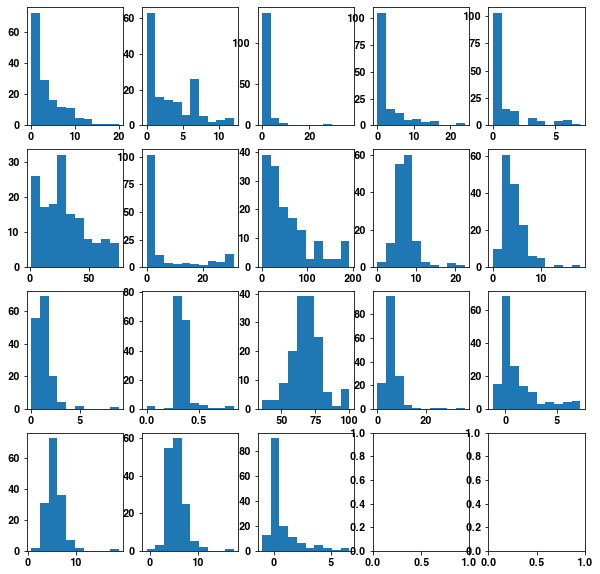

In [48]:
# 각 컬럼들에 대한 히스토그램을 그려서 데이터의 분포를 살펴본다.
fix, axs = plt.subplots(4,5, figsize=(10,10))
for i in range(len(picher_df2.columns)):
    axs[i//5,i%5].hist( picher_df2.iloc[:,i])       


In [36]:
len(picher_df2.columns)

18